In [1]:
%matplotlib inline

In [52]:
path = 'data/dogscats/'

In [3]:
batch_size = 64

In [4]:
MODEL_FILE_PATH = 'http://files.fast.ai/models/'

In [32]:
import json
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Lambda, Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils.data_utils import get_file
from keras.optimizers import Adam

In [45]:
import utils; reload(utils)
from utils import plots

In [8]:
# from vgg16.py, wasn't interesting enough to implement myself
vgg_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32).reshape((3,1,1))
def vgg_preprocess(x):
    """
        Subtracts the mean RGB value, and transposes RGB to BGR.
        The mean RGB was computed on the image set used to train the VGG model.

        Args: 
            x: Image array (height x width x channels)
        Returns:
            Image array (height x width x transposed_channels)
    """
    x = x - vgg_mean
    return x[:, ::-1] # reverse axis rgb->bgr

In [40]:
model = Sequential()
model.add(Lambda(vgg_preprocess, input_shape=(3,224,224), output_shape=(3,224,224)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1000, activation='softmax'))

In [14]:
fname = 'vgg16.h5'
model.load_weights(get_file(fname, MODEL_FILE_PATH+fname, cache_subdir='models'))

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [20]:
classes_fname = 'imagenet_class_index.json'
fpath = get_file(classes_fname, MODEL_FILE_PATH + fname, cache_subdir='models')
with open(fpath) as f:
    class_dict = json.load(f)
    
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [21]:
classes

[u'tench',
 u'goldfish',
 u'great_white_shark',
 u'tiger_shark',
 u'hammerhead',
 u'electric_ray',
 u'stingray',
 u'cock',
 u'hen',
 u'ostrich',
 u'brambling',
 u'goldfinch',
 u'house_finch',
 u'junco',
 u'indigo_bunting',
 u'robin',
 u'bulbul',
 u'jay',
 u'magpie',
 u'chickadee',
 u'water_ouzel',
 u'kite',
 u'bald_eagle',
 u'vulture',
 u'great_grey_owl',
 u'European_fire_salamander',
 u'common_newt',
 u'eft',
 u'spotted_salamander',
 u'axolotl',
 u'bullfrog',
 u'tree_frog',
 u'tailed_frog',
 u'loggerhead',
 u'leatherback_turtle',
 u'mud_turtle',
 u'terrapin',
 u'box_turtle',
 u'banded_gecko',
 u'common_iguana',
 u'American_chameleon',
 u'whiptail',
 u'agama',
 u'frilled_lizard',
 u'alligator_lizard',
 u'Gila_monster',
 u'green_lizard',
 u'African_chameleon',
 u'Komodo_dragon',
 u'African_crocodile',
 u'American_alligator',
 u'triceratops',
 u'thunder_snake',
 u'ringneck_snake',
 u'hognose_snake',
 u'green_snake',
 u'king_snake',
 u'garter_snake',
 u'water_snake',
 u'vine_snake',
 u'ni

In [53]:
batches = image.ImageDataGenerator().flow_from_directory(path+'train', target_size=(224,224),
                                                        class_mode='categorical', shuffle=True, batch_size=batch_size)

Found 23000 images belonging to 2 classes.


In [27]:
batches.next()

(array([[[[  40.,   38.,   41., ...,  160.,  144.,  139.],
          [  46.,   38.,   34., ...,  166.,  149.,  142.],
          [  71.,   59.,   45., ...,  170.,  152.,  145.],
          ..., 
          [ 196.,  211.,  226., ...,  216.,  214.,  213.],
          [ 186.,  207.,  225., ...,  214.,  216.,  215.],
          [ 179.,  205.,  225., ...,  214.,  217.,  216.]],
 
         [[  37.,   35.,   38., ...,  105.,   91.,   86.],
          [  41.,   35.,   31., ...,  111.,   96.,   89.],
          [  66.,   54.,   42., ...,  115.,   99.,   92.],
          ..., 
          [ 197.,  212.,  227., ...,  214.,  212.,  211.],
          [ 187.,  208.,  226., ...,  212.,  214.,  213.],
          [ 180.,  206.,  226., ...,  212.,  215.,  214.]],
 
         [[  30.,   28.,   31., ...,   98.,   83.,   78.],
          [  35.,   28.,   24., ...,  104.,   88.,   81.],
          [  62.,   50.,   37., ...,  108.,   91.,   84.],
          ..., 
          [ 192.,  207.,  222., ...,  217.,  215.,  214.],
  

In [54]:
val_batches = image.ImageDataGenerator().flow_from_directory(path+'valid', target_size=(224,224),
                                                        class_mode='categorical', shuffle=True, batch_size=batch_size)

Found 2000 images belonging to 2 classes.


In [29]:
model.pop()

In [30]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [42]:
for layer in model.layers: layer.trainable=False
model.add(Dense(batches.nb_class, activation='softmax'))
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
classes = list(iter(batches.class_indices))
for c in batches.class_indices:
    classes[batches.class_indices[c]] = c

In [35]:
classes

['cats', 'dogs']

In [ ]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
21696/23000 [===========================>..] - ETA: 31s - loss: 0.6932 - acc: 0.4965

In [38]:
batches.nb_sample

16

In [44]:
imgs, labels = next(batches)

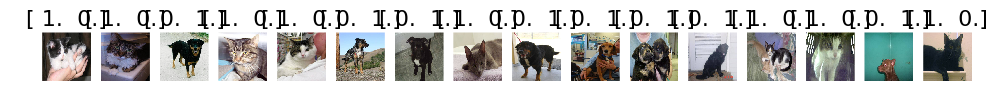

In [47]:
plots(imgs, titles=labels)

In [49]:
def predict(imgs):
    all_preds = model.predict(imgs)
    idxs = np.argmax(all_preds, axis=1)
    preds = [all_preds[i, idxs[i]] for i in range(len(idxs))]
    predicted_classes = [classes[idx] for idx in idxs]
    return np.array(preds), idxs, predicted_classes

In [50]:
predict(imgs)

(array([ 0.5004,  0.5004,  0.5004,  0.5004,  0.5004,  0.5003,  0.5004,  0.5004,  0.5003,  0.5004,
         0.5003,  0.5004,  0.5004,  0.5004,  0.5004,  0.5004], dtype=float32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 ['dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs'])